In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

## Preprocesamiento

In [8]:
df = pd.read_csv('tested.csv')
print(df.shape)
df.head()

(418, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Valores nulos

In [10]:
df.isnull().sum() / df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.205742
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.002392
Cabin          0.782297
Embarked       0.000000
dtype: float64

In [11]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [12]:
df.drop(columns=['Cabin'], inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [13]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [14]:
df.dropna(inplace=True)

In [15]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,1100.635492,0.364508,2.263789,30.200103,0.448441,0.393285,35.627188
std,120.923774,0.481870,0.842077,12.562386,0.897568,0.982419,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1101.000000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1205.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Eliminando columnas innecesarias

In [16]:
df.drop(columns=['Name', 'Ticket', 'Embarked', 'PassengerId'], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,34.5,0,0,7.8292
1,1,3,female,47.0,1,0,7.0000
2,0,2,male,62.0,0,0,9.6875
3,0,3,male,27.0,0,0,8.6625
4,1,3,female,22.0,1,1,12.2875


### Encoding
Como es una variable, se hace manual

In [17]:
df['Sex'] = df['Sex'].apply(lambda x: 1 if x == 'male' else 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,34.5,0,0,7.8292
1,1,3,0,47.0,1,0,7.0000
2,0,2,1,62.0,0,0,9.6875
3,0,3,1,27.0,0,0,8.6625
4,1,3,0,22.0,1,1,12.2875


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  417 non-null    int64  
 1   Pclass    417 non-null    int64  
 2   Sex       417 non-null    int64  
 3   Age       417 non-null    float64
 4   SibSp     417 non-null    int64  
 5   Parch     417 non-null    int64  
 6   Fare      417 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


### Eliminar duplicados

In [19]:
df.duplicated().sum()

40

In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 377 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  377 non-null    int64  
 1   Pclass    377 non-null    int64  
 2   Sex       377 non-null    int64  
 3   Age       377 non-null    float64
 4   SibSp     377 non-null    int64  
 5   Parch     377 non-null    int64  
 6   Fare      377 non-null    float64
dtypes: float64(2), int64(5)
memory usage: 23.6 KB


In [22]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [23]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X.shape, y.shape

((377, 6), (377,))

### Visualizaciones

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

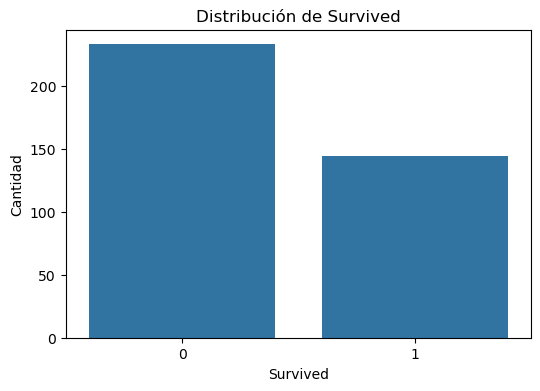

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=df)
plt.title('Distribución de Survived')
plt.xlabel('Survived')
plt.ylabel('Cantidad')
plt.show()

La gráfica muestra que la mayoría de las personas no sobrevivieron (valor 0 en Survived), con un número significativamente mayor en comparación con los sobrevivientes (valor 1). Esto sugiere una distribución desigual, donde la clase de no sobrevivientes es más prominente en el conjunto de datos, lo que podría influir en el análisis.

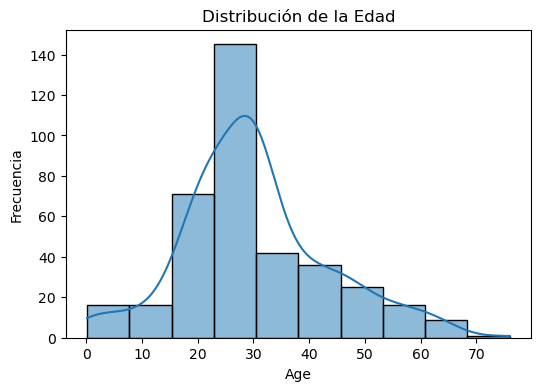

In [26]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Age'], kde=True, bins=10)
plt.title('Distribución de la Edad')
plt.xlabel('Age')
plt.ylabel('Frecuencia')
plt.show()

La gráfica muestra la distribución de la variable Age (edad) en el conjunto de datos. Se observa una alta concentración de personas jóvenes, especialmente en el rango de 20 a 30 años, con un notable pico en torno a los 30 años. A medida que la edad aumenta, la frecuencia disminuye, con pocos casos en los rangos de mayor edad. La curva de densidad también resalta este patrón, indicando una distribución sesgada hacia las edades más jóvenes.

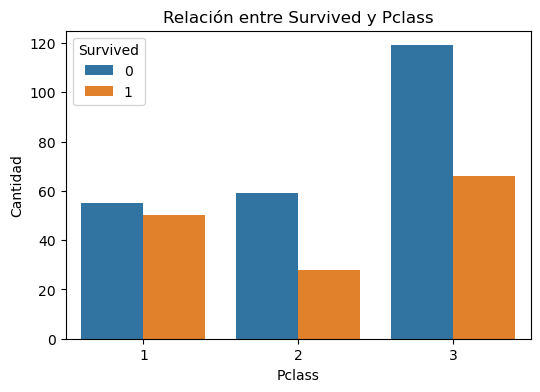

In [27]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Relación entre Survived y Pclass')
plt.xlabel('Pclass')
plt.ylabel('Cantidad')
plt.show()

La gráfica muestra la relación entre las variables Survived (supervivencia) y Pclass (clase de pasajero) en el conjunto de datos. Se observa que las personas de la clase 1 (más alta) tienen más probabilidades de haber sobrevivido, ya que la barra naranja (supervivientes) es más alta en comparación con la barra azul (no sobrevivientes). En contraste, las personas de la clase 3 (más baja) tienen una mayor proporción de no sobrevivientes, con una diferencia notable entre las barras de las clases 3 y 1. Esto sugiere que la clase socioeconómica juega un papel importante en las probabilidades de supervivencia en este contexto.

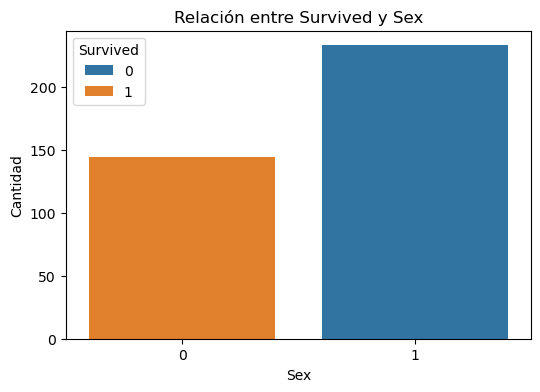

In [28]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Relación entre Survived y Sex')
plt.xlabel('Sex')
plt.ylabel('Cantidad')
plt.show()

La gráfica muestra la relación entre el género (Sex) y la supervivencia (Survived) de los pasajeros del Titanic. Se observa que la mayoría de los hombres (Sex = 1) no sobrevivieron, mientras que una mayor proporción de mujeres (Sex = 0) logró sobrevivir, reflejando posibles diferencias en las políticas de evacuación, como "mujeres y niños primero".

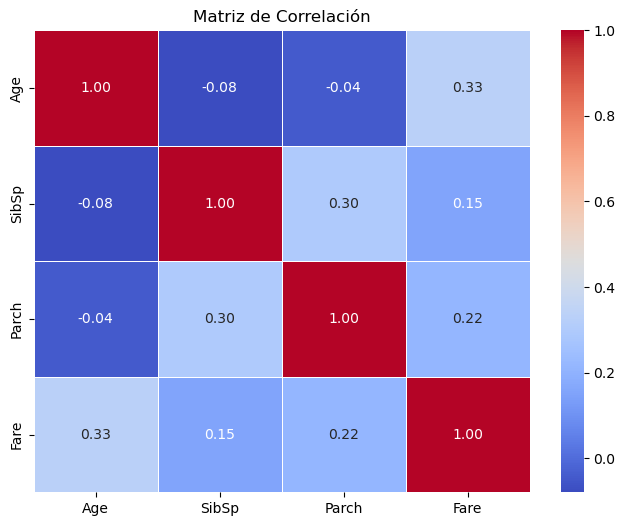

In [29]:
correlation_matrix = df[['Age', 'SibSp', 'Parch', 'Fare']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

La matriz de correlación muestra relaciones débiles entre las variables numéricas del dataset del Titanic. Destacan correlaciones moderadas como entre Fare y Age (0.33) y SibSp y Parch (0.30), lo que indica que pasajeros con más familiares a bordo tienden a viajar juntos. Las demás relaciones son débiles o inexistentes, sugiriendo que estas variables tienen poca influencia directa entre sí.

### Scaling

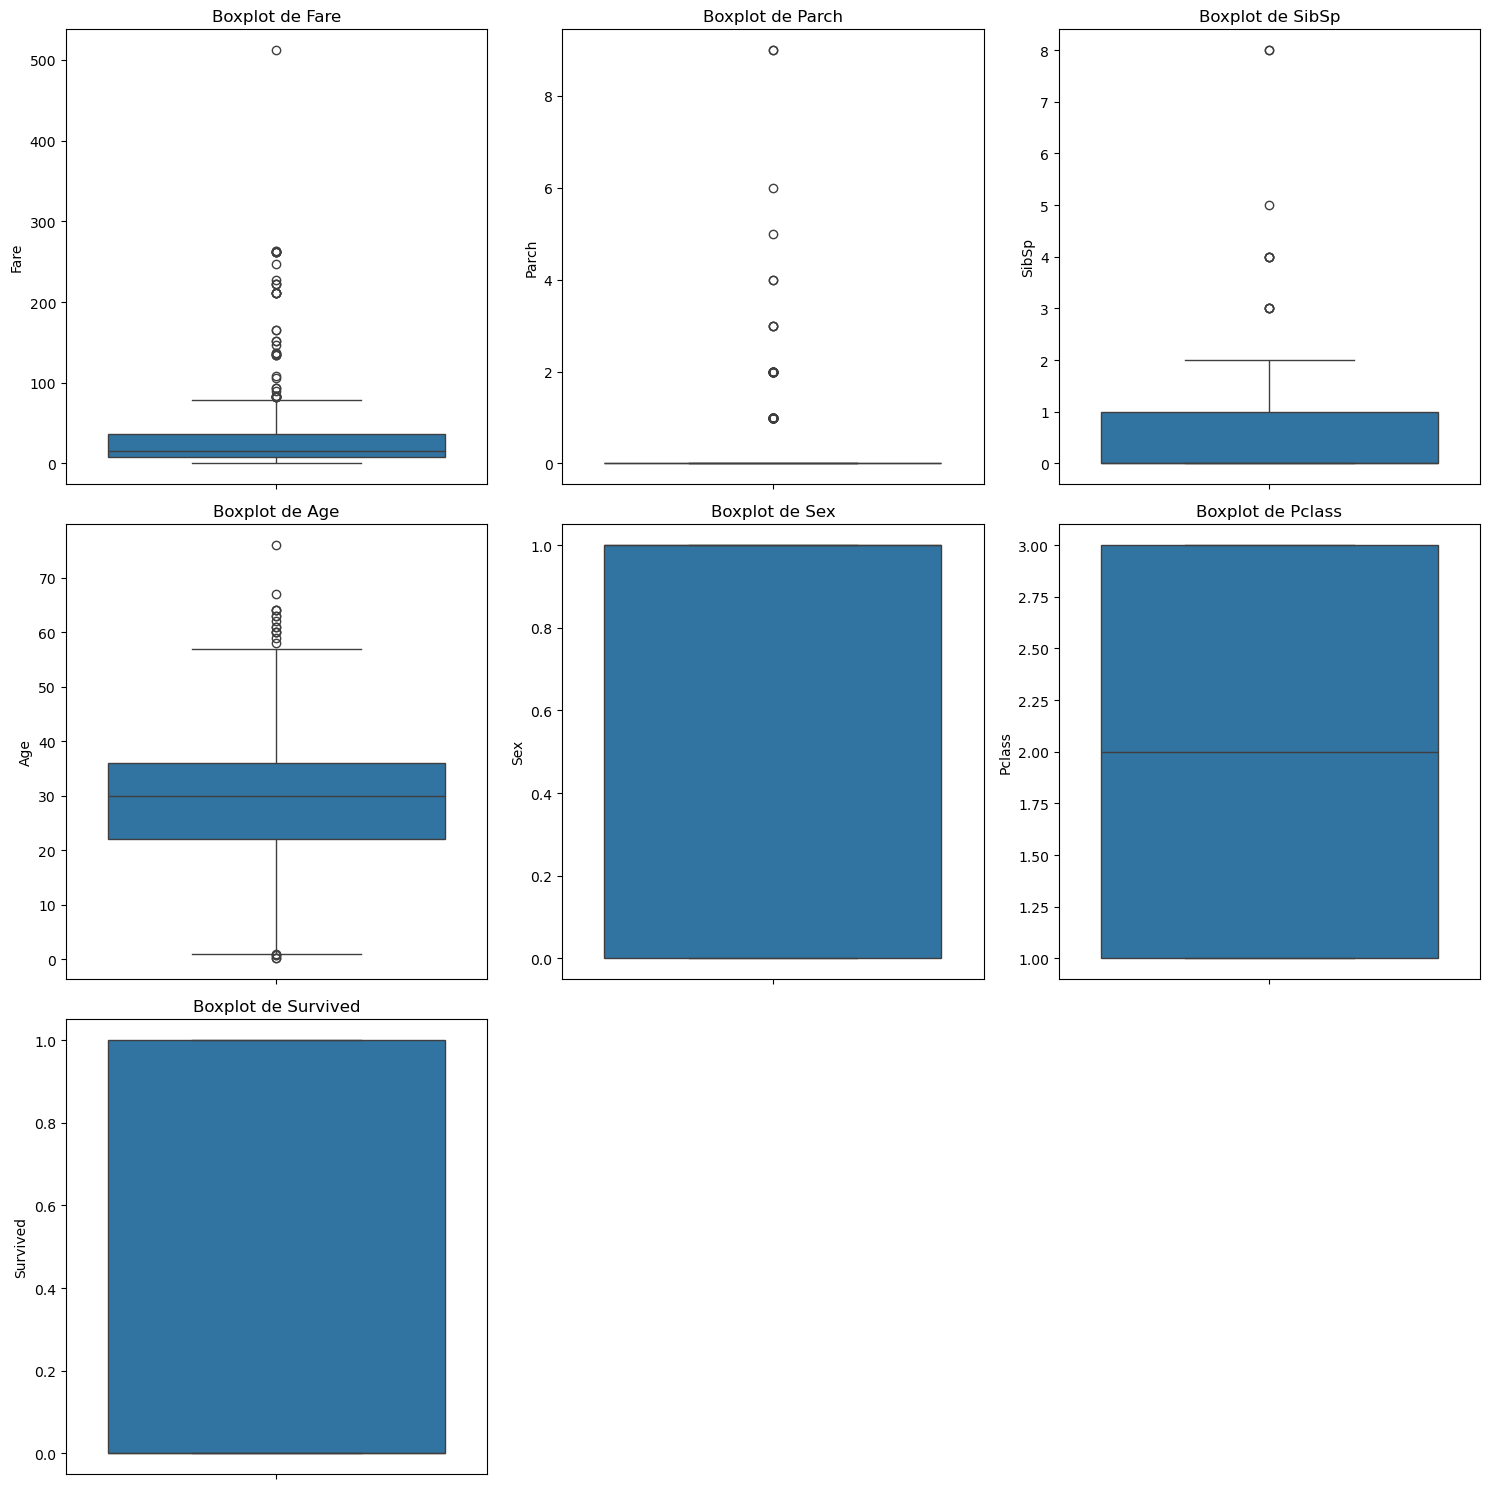

In [ ]:
def create_boxplots(df, columns=None):
    if columns is None:
        columns = df.select_dtypes(include=['number']).columns
    num_cols = len(columns)
    num_rows = (num_cols + 2) // 3
    plt.figure(figsize=(15, 5 * num_rows))
    for i, col in enumerate(reversed(columns)):
        plt.subplot(num_rows, 3, i + 1)
        sns.boxplot(y=df[col])
        plt.title(f'Boxplot de {col}')
        plt.ylabel(col)
    plt.tight_layout()
    plt.show()
    
create_boxplots(df)

Se utiliza Standard Scaler para normalizar las variables numéricas del dataset, como Age, Fare, SibSp y Parch, ya que presentan escalas muy diferentes, como se observa en los boxplots. Por ejemplo, Fare tiene valores mucho más amplios y outliers en comparación con otras variables. Además, se visualizan valores atípicos que se necesitan mantener, pero no se desea que dominen.

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import classification_report

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((301, 6), (76, 6), (301,), (76,))

## 1. Aplique por lo menos dos métodos de clasificación a los datos, utilice como variable target la columna Survived.

### Random Forest Classifier

In [21]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        27

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



Random forest tiene muy buena capacidad para discernir entre los que sobrevivieron, alcanzando un 100% de precisión.

In [72]:
with open('rf.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [22]:
importancia_predictores = pd.DataFrame({'predictor': df.drop(columns=['Survived']).columns, 'importancia': rf.feature_importances_})
importancia_predictores.sort_values('importancia', ascending=True).T

,0,3,4,2,5,1
predictor,Pclass,SibSp,Parch,Age,Fare,Sex
importancia,0.007182,0.009198,0.015468,0.029413,0.056417,0.882321


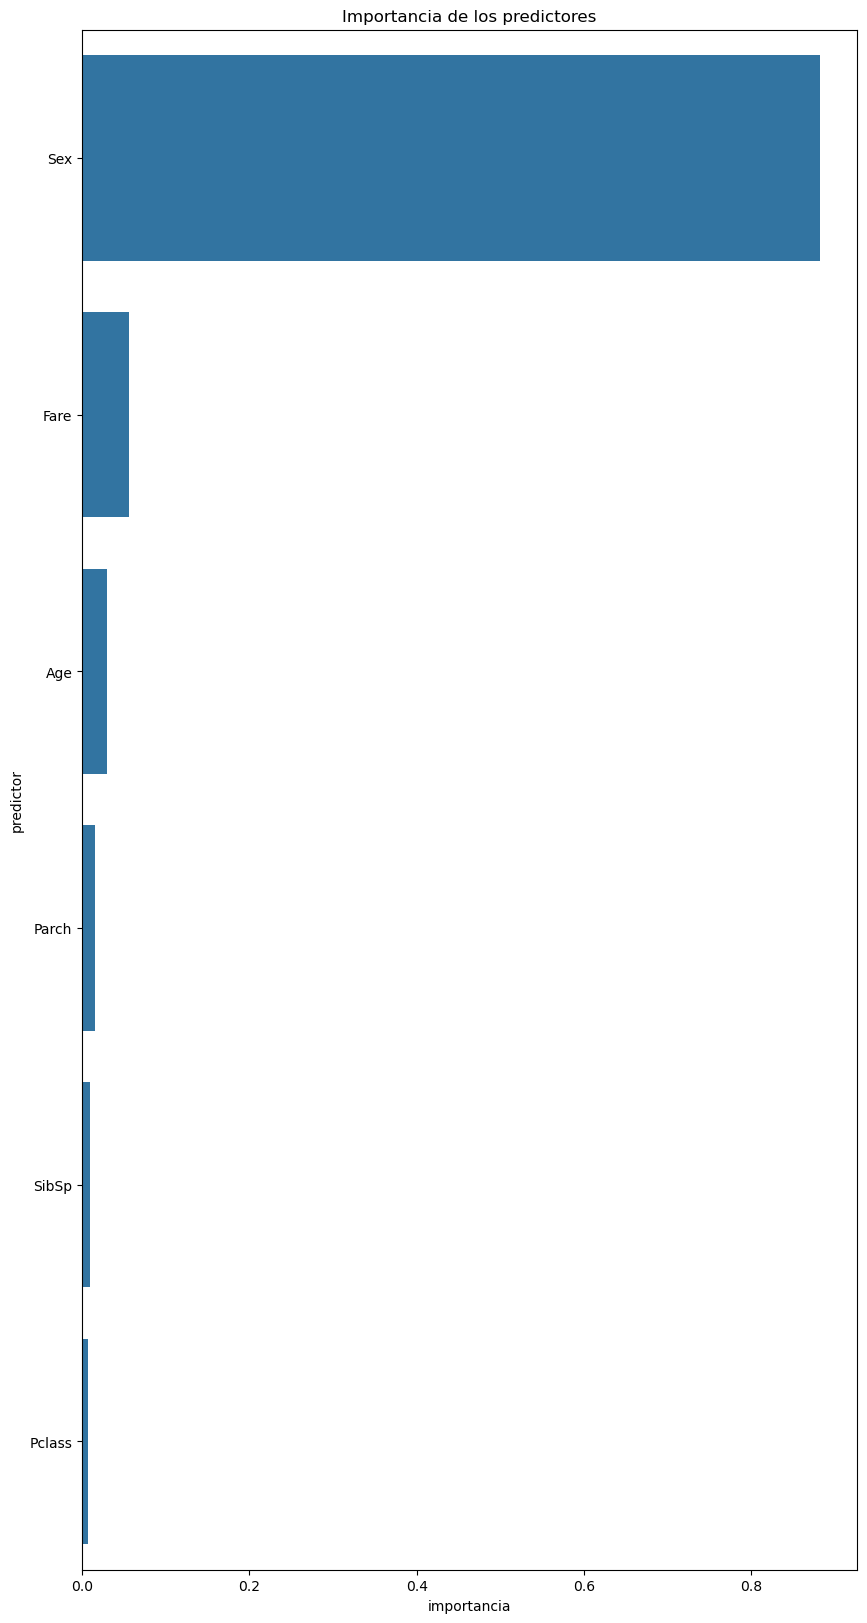

In [ ]:
plt.figure(figsize=(10, 20))
sns.barplot(x='importancia', y='predictor', data=importancia_predictores.sort_values('importancia', ascending=False))
plt.title('Importancia de los predictores')
plt.show()

La gráfica y los datos muestran la importancia relativa de los predictores en un modelo, posiblemente de clasificación o regresión. Según los resultados, la variable más importante es "Sex", con un peso dominante del 88.2%, lo que indica que tiene un impacto significativo en las predicciones del modelo. Le siguen "Fare" con un 5.6% y "Age" con un 2.9%, mientras que las demás variables ("Parch", "SibSp" y "Pclass") tienen importancias marginales, con valores menores al 2%. Esto sugiere que las características demográficas y económicas tienen un papel clave en el modelo, siendo el género (Sex) el más determinante.

### SVC

In [24]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        49
           1       1.00      0.93      0.96        27

    accuracy                           0.97        76
   macro avg       0.98      0.96      0.97        76
weighted avg       0.97      0.97      0.97        76



Por otro lado, SVC alcanza 97%, el cual es un muy buen resultado, pero que no alcanza a RF.

## 2. Utilice la librería sklearn-genetic-opt y/o optuna para la optimización de hiperparametros, compare los resultados de los modelos.

Como no se puede mejorar el resultado obtenido con random forest, se realizará la optimización de hiperparámetros con optuna y sklearn-genetic-opt con la finalidad de compararlos

### Optuna

In [25]:
import optuna

In [26]:
def objective(trial):
    C = trial.suggest_loguniform('C', 1e-3, 1e3)
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    degree = trial.suggest_int('degree', 2, 5) if kernel == 'poly' else 3
    gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])

    svc = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma)

    scores = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
    return scores.mean()

In [27]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-11-26 15:51:15,969] A new study created in memory with name: no-name-c9612870-290d-467c-9811-0b45fba2a28e
C:\Users\andre\AppData\Local\Temp\ipykernel_20560\1492138669.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2024-11-26 15:51:15,988] Trial 0 finished with value: 1.0 and parameters: {'C': 378.3465915170994, 'kernel': 'poly', 'degree': 3, 'gamma': 'scale'}. Best is trial 0 with value: 1.0.
C:\Users\andre\AppData\Local\Temp\ipykernel_20560\1492138669.py:2: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-3, 1e3)
[I 2024-11-26 15:51:16,018] Trial 1 finished with value: 0.9767

In [28]:
print("Best parameters:", study.best_params)
print("Best accuracy:", study.best_value)

Best parameters: {'C': 378.3465915170994, 'kernel': 'poly', 'degree': 3, 'gamma': 'scale'}
Best accuracy: 1.0


In [29]:
best_params = study.best_params
svc_optimized = SVC(
    C=best_params['C'],
    kernel=best_params['kernel'],
    degree=best_params.get('degree', 3),
    gamma=best_params['gamma']
)
svc_optimized.fit(X_train, y_train)

y_pred = svc_optimized.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        27

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



In [73]:
with open('svc_optuna.pkl', 'wb') as f:
    pickle.dump(svc_optimized, f)

### Sklearn-genetic-opt

In [ ]:
from deap import base, creator, tools, algorithms
import random
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

def create_individual():
    C = random.uniform(0.1, 1000)
    gamma = random.uniform(1e-5, 1)
    return [C, gamma]

def evaluate(individual):
    C, gamma = individual
    
    if gamma <= 0:
        gamma = 1e-5
    
    clf = SVC(C=C, gamma=gamma)
    clf.fit(X_train, y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    return (accuracy,)

c:\Users\andre\miniconda3\envs\dm-env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
c:\Users\andre\miniconda3\envs\dm-env\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


In [41]:
toolbox = base.Toolbox()
toolbox.register("individual", tools.initIterate, creator.Individual, create_individual)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evaluate)

In [ ]:
population_size = 50
generations = 30
cx_prob = 0.7
mut_prob = 0.2

population = toolbox.population(n=population_size)

algorithms.eaSimple(population, toolbox, cxpb=cx_prob, mutpb=mut_prob, 
                    ngen=generations, verbose=True)

gen	nevals
0  	50    
1  	39    
2  	41    
3  	38    
4  	42    
5  	33    
6  	41    
7  	44    
8  	41    
9  	40    
10 	43    
11 	33    
12 	43    
13 	43    
14 	39    
15 	41    
16 	36    
17 	39    
18 	44    
19 	40    
20 	40    
21 	42    
22 	37    
23 	40    
24 	37    
25 	31    
26 	35    
27 	28    
28 	40    
29 	36    
30 	38    


([[110.72738726179404, -1.8102789313432486],
  [809.5216373420415, 0.02542305543186659],
  [808.873626219663, 0.02542305543186659],
  [810.493262794097, 0.02542305543186659],
  [808.7022586262136, 0.02542305543186659],
  [808.7347407050627, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [808.873626219663, 0.02542305543186659],
  [808.8906127691678, 0.02542305543186659],
  [808.7022586262136, 0.02542305543186659],
  [809.906274143122, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [808.7022586262136, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [809.5216373420415, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [110.72738726179404, 0.02542305543186659],
  [808.7347407050627, 0.02542305543186659],
  [808.873626219663, 0.02542305543186659],
  [808.873626219663, 0.02542305543186659],
  [809.5216373420415, 0.4917524782471723],
  [808.873626219663, 0.025423055

In [43]:
best_individual = tools.selBest(population, 1)[0]
print(f"Best individual: {best_individual}")

Best individual: [110.72738726179404, -1.8102789313432486]


In [ ]:
C, gamma = best_individual

if gamma <= 0:
	gamma = 1e-5

final_clf = SVC(C=C, gamma=gamma)
final_clf.fit(X_train, y_train)
final_accuracy = accuracy_score(y_test, final_clf.predict(X_test))
print(f"Final accuracy with best hyperparameters: {final_accuracy}")

Final accuracy with best hyperparameters: 1.0


In [71]:
with open('svc_genetic.pkl', 'wb') as f:
    pickle.dump(final_clf, f)

**Interpretación:** En este caso, random forest obtiene mejores resultados sin necesidad de optimizar los hiperparámetros, ya que este modelo no hace suposiciones sobre la linealidad de los datos. SVC, de manera contraria, asume esta linealidad; no obstante, la diferencia de rendimiento sirvió para demostrar que las técnicas avanzadas de optimización de hiperparámetros son efectivas, logrando igualar el rendimiento de rf.

## 3. Realice el despliegue de la aplicación utilizando la librería streamlit.

Enlace desplegado: https://titanic-ef-data-mining-pilco.streamlit.app/

## 4. Interprete los resultados obtenidos

En las pruebas de despliegue, a pesar de que modelos como el SVC optimizado genéticamente, el SVC optimizado con Optuna y el Random Forest pueden alcanzar un rendimiento del 100%, es común observar resultados dispares debido a variaciones en los procesos de optimización de hiperparámetros, la aleatoriedad de ciertos algoritmos y la división de datos.

La estandarización de los datos juega un papel crucial, especialmente en algoritmos sensibles como el SVC, para garantizar que todas las características tengan el mismo peso y evitar que una variable, como el género, domine el modelo de manera desproporcionada. Esto no solo mejora la consistencia en los resultados, sino que también optimiza la capacidad de los modelos para generalizar a nuevos datos. La correcta optimización de hiperparámetros permite maximizar el rendimiento y la robustez de los modelos, reduciendo el riesgo de sobreajuste y mejorando la fiabilidad de las predicciones.

Además, las visualizaciones de datos son fundamentales para anticiparse a la importancia de las variables y guiar el desarrollo del modelo. Gráficos como mapas de calor de correlación ehistogramas permiten identificar relaciones clave entre las variables y posibles sesgos en los datos. Este análisis previo no solo ayuda a seleccionar características relevantes, sino también a entender cómo las variables pueden influir en el modelo, facilitando ajustes en la preprocesamiento y la elección de hiperparámetros.